In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
health_df = pd.read_csv("/content/sample_data/data_final.csv")

In [ ]:
pd.value_counts(health_df.HealthStatus)

8    15000
7    15000
6    15000
5    15000
4    15000
3    15000
2    15000
1    15000
Name: HealthStatus, dtype: int64

In [ ]:
print(health_df.info())
pd.set_option('display.max_columns', None)
print(health_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Age           120000 non-null  int64  
 1   Calories      120000 non-null  float64
 2   CaloriesMets  120000 non-null  float64
 3   Steps         120000 non-null  int64  
 4   Distance      120000 non-null  float64
 5   Floors        120000 non-null  int64  
 6   HeartRate     120000 non-null  int64  
 7   SleepScore    120000 non-null  int64  
 8   HealthStatus  120000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 8.2 MB
None
   Age     Calories  CaloriesMets  Steps  Distance  Floors  HeartRate  \
0   22  3569.203875     16.331711  11629  5.550690      30         69   
1   30  3379.615223      8.039367  12499  3.283475      36         67   
2   29  3762.280082      5.129485  12412  5.663306      35         62   
3   25  3030.589983      5.456242  12608  3.092049      37 

In [ ]:
health_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,120000.0,34.988967,8.746980,20.000000,28.000000,35.000000,42.000000,50.000000
Calories,120000.0,2231.873764,703.288256,700.226867,1697.288503,2203.721267,2733.349328,3999.895000
CaloriesMets,120000.0,6.269884,4.847985,0.000000,1.986440,5.906746,9.695814,19.098300
Steps,120000.0,6002.346433,3035.320936,200.000000,3632.000000,5724.000000,8239.000000,13500.000000
Distance,120000.0,3.802007,3.221066,0.000000,0.683239,3.473490,6.020092,12.999421
Floors,120000.0,9.238842,9.044910,0.000000,2.000000,7.000000,13.000000,37.000000
HeartRate,120000.0,79.255675,13.905386,50.000000,69.000000,78.000000,90.000000,110.000000
SleepScore,120000.0,76.243892,11.035630,55.000000,68.000000,75.000000,85.000000,100.000000
HealthStatus,120000.0,4.500000,2.291297,1.000000,2.750000,4.500000,6.250000,8.000000


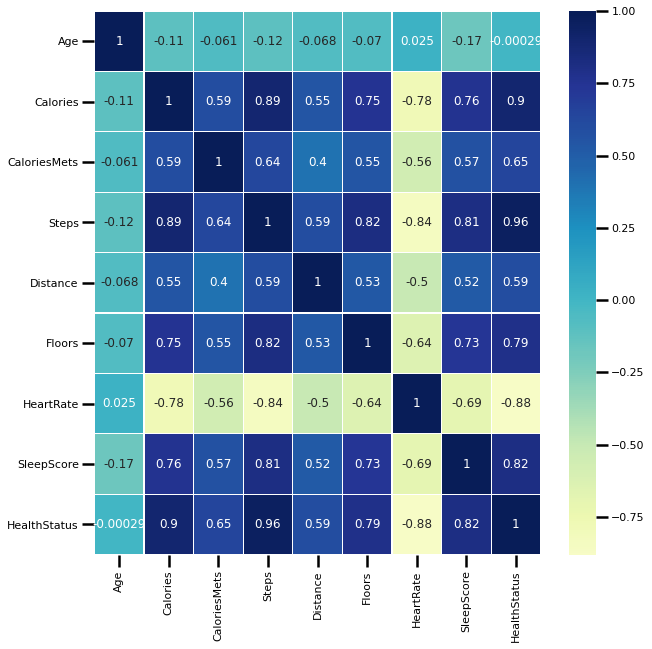

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context("poster",font_scale=0.5)
plot = sns.heatmap(health_df.corr(),annot=True,linewidths=.2,center=0,cbar=True,cmap="YlGnBu")
plot.figure.savefig("corr.png")

In [ ]:
corr_df = health_df.corr()

In [ ]:
corr_df[((corr_df > 0.3) & (corr_df < 1))| (corr_df < -0.3)].dropna(how='all')

,Age,Calories,CaloriesMets,Steps,Distance,Floors,HeartRate,SleepScore,HealthStatus
Calories,NaN,NaN,0.591900,0.892413,0.547219,0.753691,-0.783631,0.757770,0.898093
CaloriesMets,NaN,0.591900,NaN,0.635816,0.403413,0.546730,-0.558462,0.567655,0.646494
Steps,NaN,0.892413,0.635816,NaN,0.591226,0.819352,-0.836810,0.810381,0.962857
Distance,NaN,0.547219,0.403413,0.591226,NaN,0.534910,-0.500348,0.520697,0.589196
Floors,NaN,0.753691,0.546730,0.819352,0.534910,NaN,-0.641162,0.728176,0.789088
HeartRate,NaN,-0.783631,-0.558462,-0.836810,-0.500348,-0.641162,NaN,-0.685096,-0.880775
SleepScore,NaN,0.757770,0.567655,0.810381,0.520697,0.728176,-0.685096,NaN,0.815371
HealthStatus,NaN,0.898093,0.646494,0.962857,0.589196,0.789088,-0.880775,0.815371,NaN


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(health_df.drop(['HealthStatus'],axis=1), health_df['HealthStatus'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((90000, 8), (30000, 8))

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_acc_train = dtc.score(X_train,y_train)
print("Decision Tree Training accuracy",dtc_acc_train)  

dtc_acc_test = dtc.score(X_test, y_test)
print("Decision Tree  Testing accuracy",dtc_acc_test)

Decision Tree Training accuracy 1.0
Decision Tree  Testing accuracy 0.8928


In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc_acc_train = rfc.score(X_train,y_train)
print("Random Forest Training accuracy",rfc_acc_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn import metrics
mae_rfc = (metrics.mean_absolute_error(y_test, rfc_pred))
mse_rfc = (metrics.mean_squared_error(y_test, rfc_pred))

print("Mean Absolute Error : ",mae_rfc)
print("Mean Sqaured Error : ",mse_rfc)

Mean Absolute Error :  0.09863333333333334
Mean Sqaured Error :  0.09876666666666667


In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_test, rfc_pred): 
    y_test, y_pred = np.array(y_test), np.array(rfc_pred)
    return np.mean(np.abs((y_test - rfc_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test,rfc_pred)

3.6281190476190472

In [ ]:
rfc_pred_score = (rfc.score(X_test,y_test))
rfc_pred_score

0.9014333333333333

In [ ]:
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(y_test,rfc_pred)
print(cm)
print(skm.classification_report(y_test,rfc_pred))
# TP FP 
# FN TN

[[[25856   405]
  [  274  3465]]

 [[25672   543]
  [  581  3204]]

 [[25486   713]
  [  626  3175]]

 [[25652   533]
  [  731  3084]]

 [[25923   392]
  [  345  3340]]

 [[26060   260]
  [  266  3414]]

 [[26164    90]
  [  114  3632]]

 [[26230    21]
  [   20  3729]]]
              precision    recall  f1-score   support

           1       0.90      0.93      0.91      3739
           2       0.86      0.85      0.85      3785
           3       0.82      0.84      0.83      3801
           4       0.85      0.81      0.83      3815
           5       0.89      0.91      0.90      3685
           6       0.93      0.93      0.93      3680
           7       0.98      0.97      0.97      3746
           8       0.99      0.99      0.99      3749

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



In [ ]:
import joblib
filename = 'finalized_model_rfc.sav'
joblib.dump(rfc, filename)

['finalized_model_rfc.sav']

In [ ]:
model = joblib.load("/content/sample_data/finalized_model.sav")

result_test = model.predict(X_test)